In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [26]:
def load_image():
    blank_img=np.zeros((600,600))
    font=cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCD',org=(50,300),fontFace=font,fontScale=5,color=(255,255,255),thickness=20)
    return blank_img

In [27]:
#function to display the image in desired size
def show_image(img):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

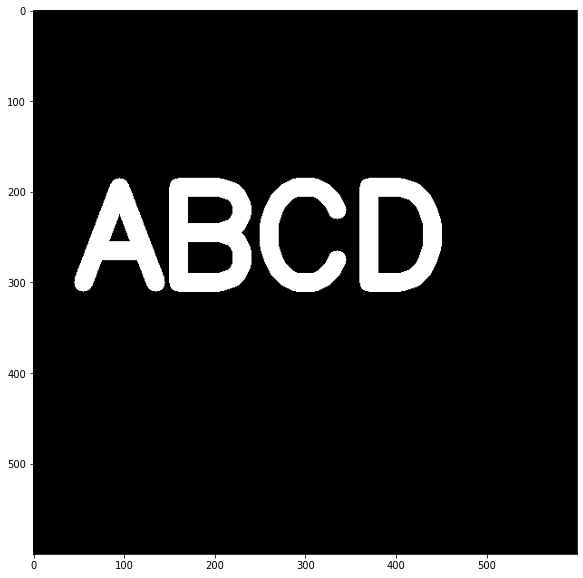

In [28]:
i=load_image()
show_image(i)

now gonna use diff morphological operators on this image

In [30]:
#erosion-Main task of this particular morphological operator is to
#erode the boundary of the objects which are in the foreground of the image

In [31]:
#defining a kernel
kernel=np.ones((5,5),dtype=np.uint)

In [32]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint64)

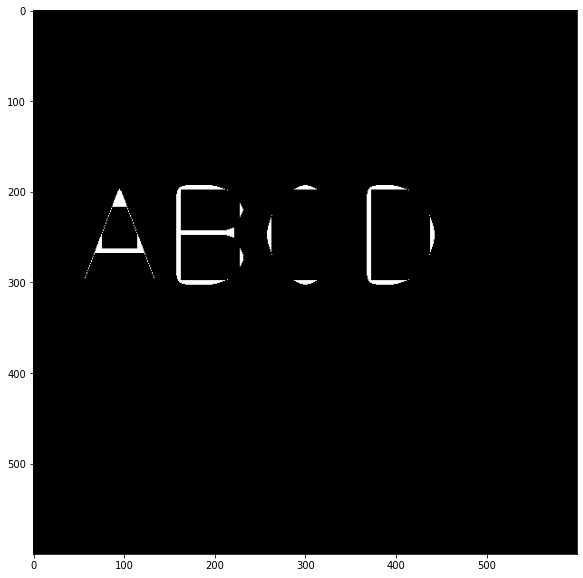

In [33]:
#the value of iterations parameter effects the amount of erosion performed on the object .
#here 4 is a bit higher value but used just to showcase the effect.
er_img=cv2.erode(i,kernel,iterations=4)
show_image(er_img)

In [34]:
#reloading the image

In [35]:
i=load_image()

In [38]:
#creating some white noise
white_noise=np.random.randint(low=0,high=2,size=(600,600))

In [39]:
white_noise

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 0]])

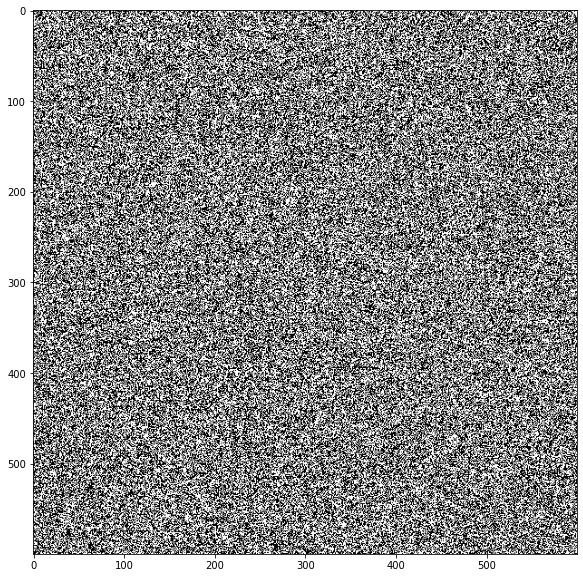

In [40]:
show_image(white_noise)

In [41]:
#matching the scale of both the image and noise image
i.max()

255.0

In [42]:
white_noise.max()

1

In [43]:
white_noise=white_noise*255

In [44]:
white_noise.max()

255

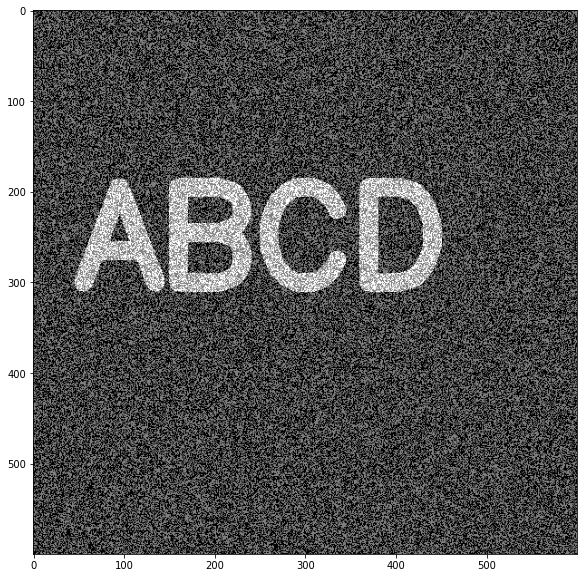

In [45]:
#adding the noise image to original image
img2=i+white_noise
show_image(img2)

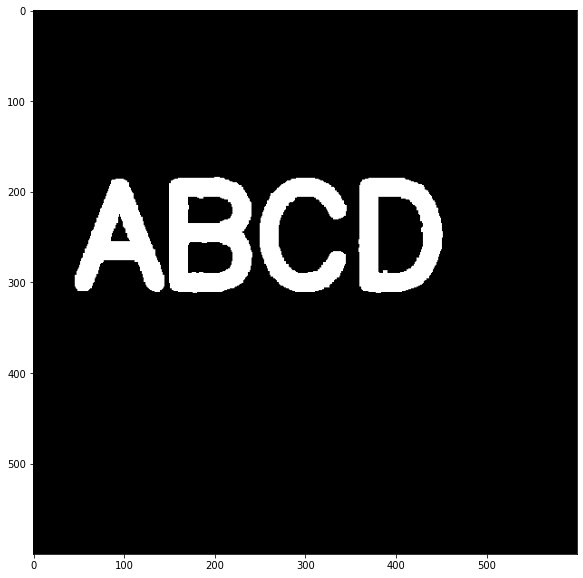

In [46]:
#using 'Opening' operation to get rid of the noise
#opening is really useful while removing background noise
opimg=cv2.morphologyEx(img2,cv2.MORPH_OPEN,kernel)
show_image(opimg)

In [65]:
img1=load_image()

In [48]:
#creating and adding black noise to the imgae i.e adding the noise only to the foreground object

In [66]:
black_noise1=np.random.randint(low=0,high=2,size=(600,600))

In [67]:
img1.max()

255.0

In [68]:
img1.min()

0.0

In [69]:
black_noise1.min()

0

In [70]:
black_noise1.max()

1

In [58]:
#here in the black noise we want only dark pixels so that it can disturb only the object in the forground of our im

In [71]:
black_noise1=black_noise1*-255

In [72]:
blac_noiseimg=black_noise1+img1

In [73]:
blac_noiseimg

array([[   0.,    0., -255., ...,    0., -255.,    0.],
       [   0., -255., -255., ...,    0.,    0.,    0.],
       [-255., -255., -255., ...,    0.,    0.,    0.],
       ...,
       [   0., -255., -255., ..., -255.,    0., -255.],
       [-255.,    0.,    0., ...,    0.,    0.,    0.],
       [   0., -255., -255., ...,    0., -255.,    0.]])

In [74]:
blac_noiseimg[blac_noiseimg==-255]=0

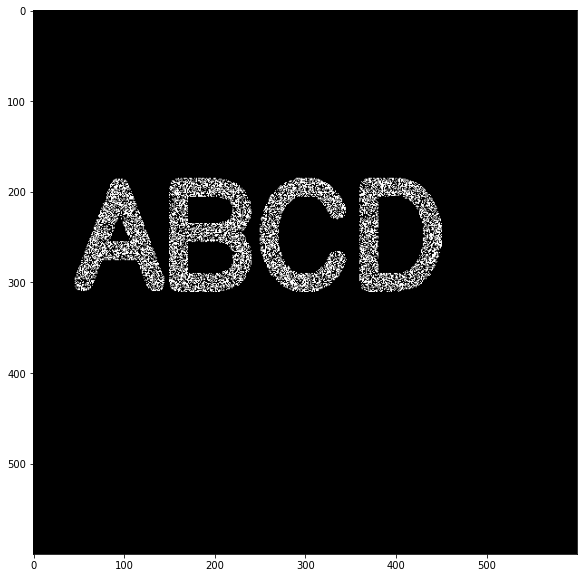

In [76]:
blac_noiseimg
show_image(blac_noiseimg)

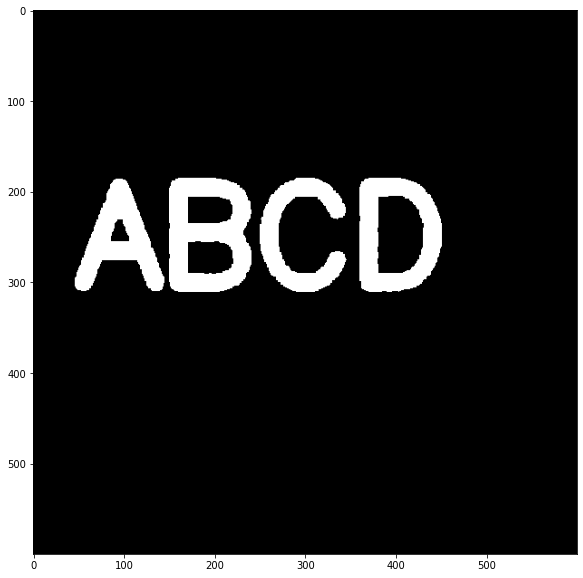

In [77]:
#using closing technique to remove the noise in the foreground
closed_img=cv2.morphologyEx(blac_noiseimg,cv2.MORPH_CLOSE,kernel)
show_image(closed_img)

In [78]:
img=load_image()

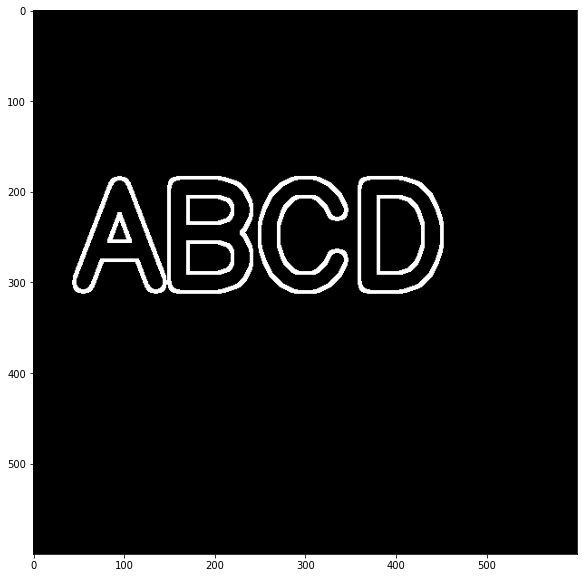

In [79]:
morph_img=cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
show_image(morph_img)